In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file1 = pd.read_csv("https://raw.githubusercontent.com/Mushkat/DsCourseProject/main/profes16.csv", delimiter=';', on_bad_lines='skip')
file2 = pd.read_csv("https://raw.githubusercontent.com/Mushkat/DsCourseProject/main/profes23.csv", delimiter=';', on_bad_lines='skip')
years1 = file1.columns[1:].astype(int)
sal1 = file1[file1['Отрасль'] == 'Строительство'].values[0][1:]
years2 = file2.columns[1:-1].astype(int)
sal2 = file2[file2['Отрасль'] == 'строительство'].values[0][1:-1]
sal2[0] = int(sal2[0])

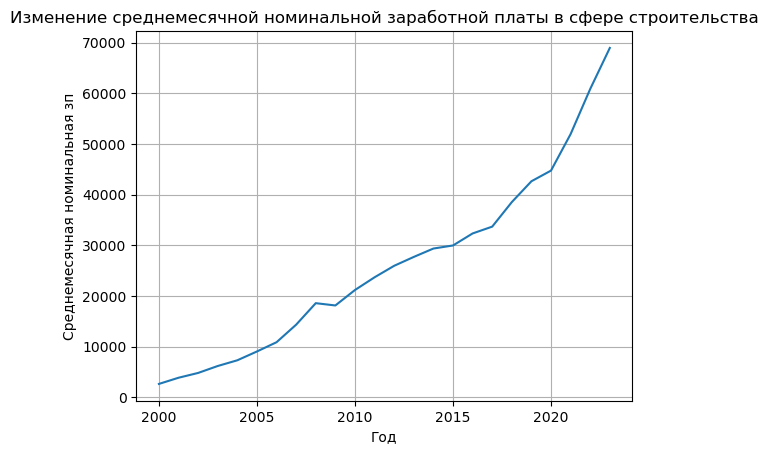

In [3]:
sal_all_build = np.concatenate((sal1, sal2))
years = np.concatenate((years1, years2))
plt.title('Изменение среднемесячной номинальной заработной платы в сфере строительства')
plt.xlabel('Год')
plt.ylabel('Среднемесячная номинальная зп')
plt.plot(years, sal_all_build, '-')
plt.grid(True)

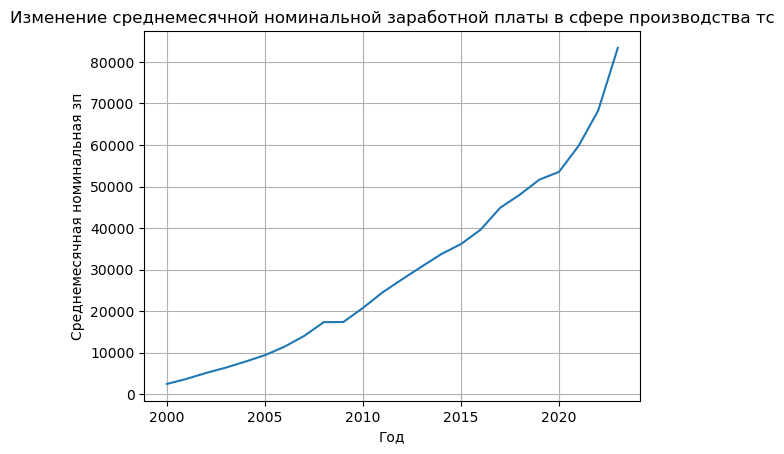

In [4]:
sal1_ts = file1[file1['Отрасль'] == 'производство транспортных средств и оборудования'].values[0][1:]
sal2_ts = file2[file2['Отрасль'] == 'производство прочих транспортных средств и оборудования'].values[0][1:-1]
sal2_ts[0] = int(sal2_ts[0])
sal_all_ts = np.concatenate((sal1_ts, sal2_ts))
plt.title('Изменение среднемесячной номинальной заработной платы в сфере производства тс')
plt.xlabel('Год')
plt.ylabel('Среднемесячная номинальная зп')
plt.plot(years, sal_all_ts, '-')
plt.grid(True)

In [5]:
real_sal_build = []
for i in range((len(sal_all_build)-2)):
    t = ((sal_all_build[i+1] - sal_all_build[i])/ sal_all_build[i])*100
    real_sal_build.append(t)
file_infl = pd.read_csv("https://raw.githubusercontent.com/Mushkat/DsCourseProject/main/inflation.csv", delimiter=';', on_bad_lines='skip')
infl = file_infl[file_infl['Год'] == 'Всего'].values[0][1:]

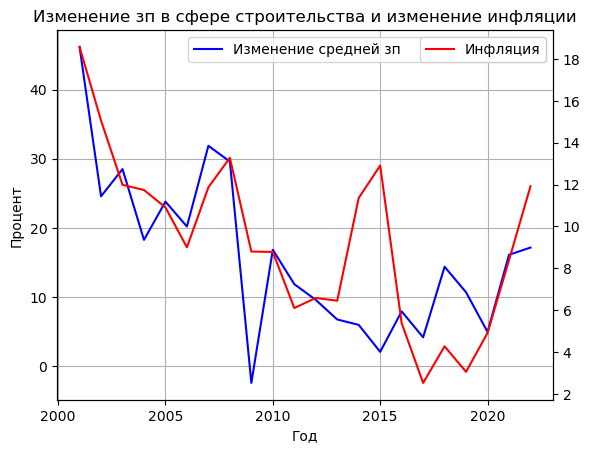

In [6]:
fig, plt1 = plt.subplots()
plt2 = plt1.twinx()
plt1.set_title("Изменение зп в сфере строительства и изменение инфляции")
plt1.set_xlabel('Год')
plt1.set_ylabel('Процент')
plt1.plot(years[1:-1], real_sal_build, "-", color = 'b', label = 'Изменение средней зп                                ' )
plt2.plot(years[1:-1], infl[1:-1], "-", color = 'r', label = 'Инфляция' )
plt1.legend()
plt2.legend()
plt1.grid(True)

In [7]:
real_sal_ts = []
for i in range((len(sal_all_ts)-2)):
    t = ((sal_all_ts[i+1] - sal_all_ts[i])/ sal_all_ts[i])*100
    real_sal_ts.append(t)

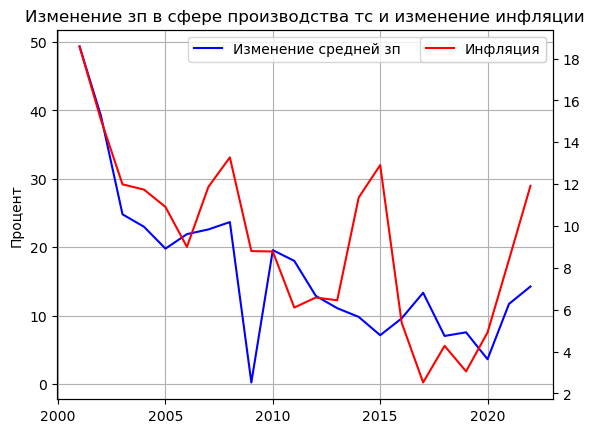

In [8]:
fig, plt1 = plt.subplots()
plt2 = plt1.twinx()
plt1.set_title("Изменение зп в сфере производства тс и изменение инфляции")
plt1.set_ylabel('Процент')
plt1.plot(years[1:-1], real_sal_ts, "-", color = 'b', label = 'Изменение средней зп                                ' )
plt2.plot(years[1:-1], infl[1:-1], "-", color = 'r', label = 'Инфляция' )
plt1.legend()
plt2.legend()
plt1.grid(True)

In [9]:
change_infl = []
for i in range(len(infl)):
    infl[i] = (infl[i]+100)/100
    change_infl.append(infl[i])
real_sal = []
for a in range(len(sal_all_build)):
    real_sal.append(sal_all_build[a]/change_infl[a])

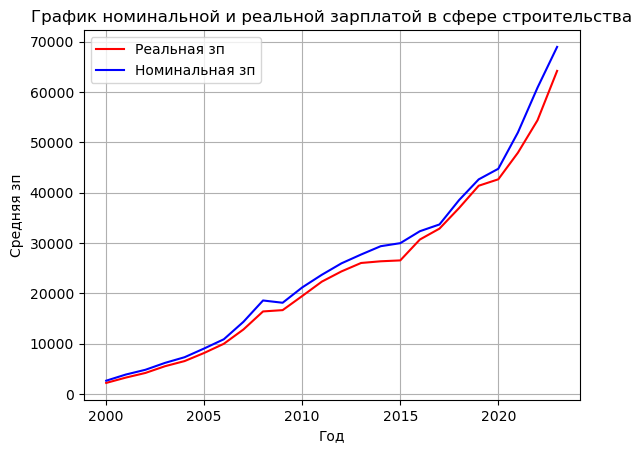

In [10]:
plt.plot(years, real_sal, '-', color = 'r',label = 'Реальная зп' )
plt.plot(years, sal_all_build, '-', color = 'b',label = 'Номинальная зп')  
plt.legend()
plt.title('График номинальной и реальной зарплатой в сфере строительства')
plt.xlabel('Год')
plt.ylabel('Средняя зп')
plt.grid(True)

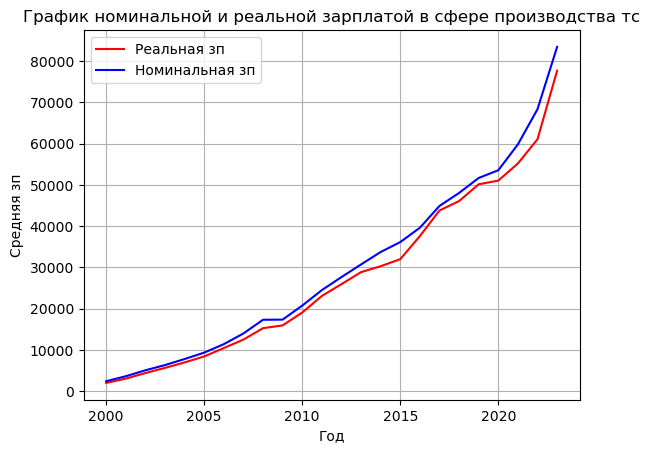

In [11]:
real_sal2 = []
for a in range(len(sal_all_ts)):
    real_sal2.append(sal_all_ts[a]/change_infl[a])
plt.plot(years, real_sal2, '-', color = 'r',label = 'Реальная зп')
plt.plot(years, sal_all_ts, '-', color = 'b', label = 'Номинальная зп')  
plt.legend()
plt.title('График номинальной и реальной зарплатой в сфере производства тс')
plt.xlabel('Год')
plt.ylabel('Средняя зп')
plt.grid(True)

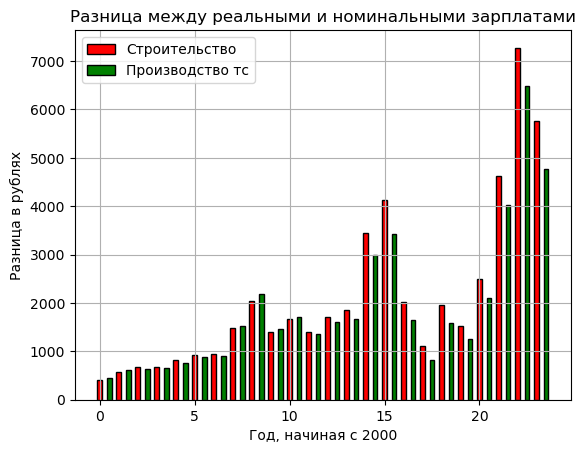

In [12]:
    dis_build = []
    dis_ts = []
    for i in range(len(sal_all_ts)):
        dis_build.append(sal_all_ts[i]-real_sal2[i])
    for j in range(len(sal_all_build)):
        dis_ts.append(sal_all_build[j]-real_sal[j])
    n = len(sal_all_build)
    r = np.arange(n) 
    plt.bar(r, dis_build, color = 'r', width = 0.25, edgecolor = 'black', label='Строительство') 
    plt.bar(r+0.5, dis_ts, color = 'g', width = 0.25, edgecolor = 'black', label='Производство тс') 
    plt.xlabel("Год, начиная с 2000") 
    plt.ylabel("Разница в рублях") 
    plt.title("Разница между реальными и номинальными зарплатами") 
    plt.legend() 
    plt.grid(True)